<img src="EPL image.PNG">

## Import libraries

In [126]:
import pandas as pd
import matplotlib.pyplot as plt  
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Stage 1: Data exploration

> ### Reading data and see some data rows 
> Quick view of dataset

In [87]:
data = pd.read_csv('EPL_20_21 (1).csv')
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


> ### Data type of each column

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

<div class="alert alert-block alert-info">
<b>Conclude:</b> Data type of 18 columns consist of 3 types: float64(3), int64(11) and object(4).
</div>

> ### Number of rows and columns in the dataset

In [89]:
data.shape

(532, 18)

> ### See all columns of dataset

In [90]:
data.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

About **xG** stat <br>
https://blackcatsvk.wixsite.com/website/post/amateur-numbers-expected-goal-xg

In [ ]:
> ### Unique values of each column

In [91]:
data.nunique()

Name                     524
Club                      20
Nationality               59
Position                  10
Age                       23
Matches                   38
Starts                    39
Mins                     458
Goals                     21
Assists                   13
Passes_Attempted         449
Perc_Passes_Completed    261
Penalty_Goals              9
Penalty_Attempted          8
xG                        61
xA                        37
Yellow_Cards              13
Red_Cards                  3
dtype: int64

> ###  Number of duplicated values

In [92]:
data.duplicated().sum()

0

> ### Missing value imputation
> Checking for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature)

In [93]:
data.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

<div class="alert alert-block alert-info">
<b>Conclude:</b> Each column has no null data.
</div>

> ### Descriptive statistic
> Descriptive statistic about 3 datatypes of dataset. Describe() is used to view some basic statistical details like percentile, mean, std, max, min, etc. of a dataset or a series of numeric values. When this method is applied to a series of string, it returns a different output (the number of unique values and the top frequency).

In [94]:
# float datatype
data.select_dtypes(include='float').describe().T

,count,mean,std,min,25%,50%,75%,max
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
xG,532.0,0.113289,0.148174,0.0,0.01,0.06,0.150,1.16
xA,532.0,0.072650,0.090072,0.0,0.00,0.05,0.110,0.90


Note: min of Perc_Passes_Completed is unreasonable value (-1) and we will process in the next stage

In [95]:
# integer datatypes
data.select_dtypes(include='int64').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.0,26.0,29.0,38.0
Matches,532.0,19.535714,11.840459,1.0,9.0,21.0,30.0,38.0
Starts,532.0,15.714286,11.921161,0.0,4.0,15.0,27.0,38.0
Mins,532.0,1411.443609,1043.171856,1.0,426.0,1345.0,2303.5,3420.0
Goals,532.0,1.853383,3.338009,0.0,0.0,1.0,2.0,23.0
Assists,532.0,1.287594,2.095191,0.0,0.0,0.0,2.0,14.0
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.5,573.5,1129.5,3214.0
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.0,0.0,0.0,9.0
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.0,0.0,0.0,10.0
Yellow_Cards,532.0,2.114662,2.269094,0.0,0.0,2.0,3.0,12.0


In [96]:
# object datatype
data.select_dtypes(include='object').describe().T

,count,unique,top,freq
Name,532,524,Robert Snodgrass,2
Club,532,20,West Bromwich Albion,30
Nationality,532,59,ENG,192
Position,532,10,DF,178


- EPL 2020-2021 has 524 footballers. We can find that 8 players played for 2 clubs in one season.
- 20 clubs in EPL
- 524 players from 59 countries
- West Brom is the club with the most players registered (30)
- 178 players can play in Defender position

> ### Correlation
> corr() is used to find the pairwise correlation of all columns in the dataframe. Any NaN values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

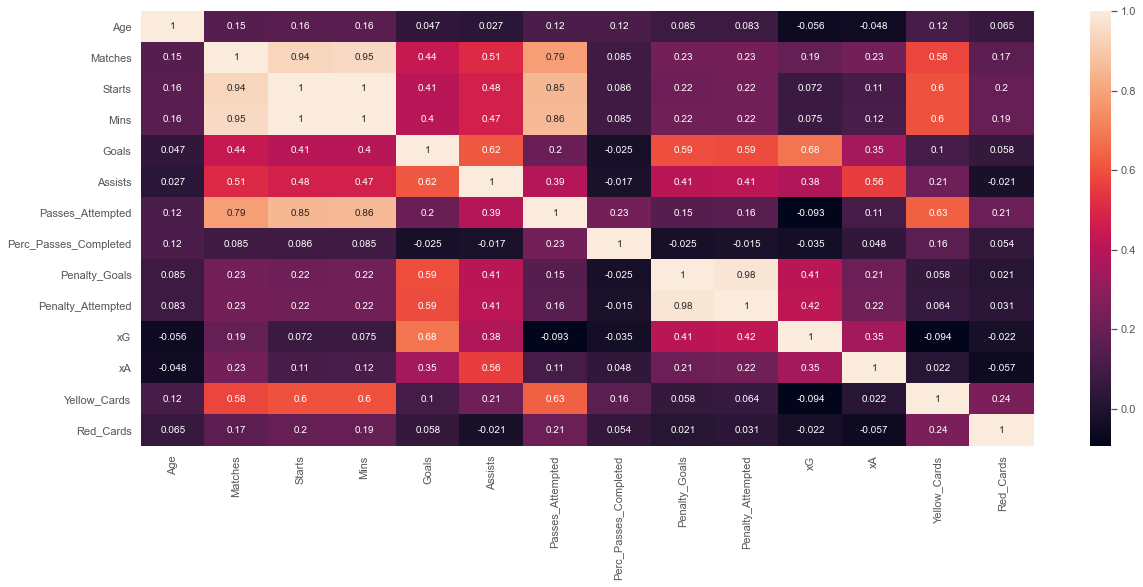

In [97]:
corrMatrix = data.corr()

# visualize linear correlation (annot=True displays the accurate values of correlation between pairwise column)
sns.heatmap(corrMatrix, annot=True)  
plt.show()

## Stage 2: Data Assessing & Manipulation

> ### List of Clubs in EPL (alphabet order)

In [98]:
EPL = data.Club.unique()
print(sorted(EPL))

['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool FC', 'Manchester City', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Southampton', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United', 'Wolverhampton Wanderers']


<img src="download.PNG">

> ### The ratio of domestic players in Premier League 2020-2021

In [99]:
data.Nationality.unique()

array(['ENG', 'SEN', 'GER', 'ESP', 'FRA', 'ITA', 'BRA', 'CRO', 'USA',
       'DEN', 'MAR', 'SCO', 'ARG', 'POR', 'BEL', 'ALG', 'UKR', 'NED',
       'SWE', 'URU', 'SRB', 'WAL', 'CIV', 'NGA', 'EGY', 'TUR', 'CMR',
       'GUI', 'SUI', 'JPN', 'IRL', 'GRE', 'NIR', 'GHA', 'AUT', 'JAM',
       'RSA', 'CZE', 'POL', 'PAR', 'COD', 'KOR', 'COL', 'GAB', 'NOR',
       'AUS', 'BIH', 'ISL', 'MKD', 'BFA', 'ZIM', 'SVK', 'MEX', 'CAN',
       'MLI', 'IRN', 'NZL', 'MTN', 'SKN'], dtype=object)

In [100]:
domestic = data.Nationality[data.Nationality=='ENG'].count()
print("The ratio of domestic players in the Premier League is {}% ({} players)".format(round(domestic/data.Nationality.count()*100, 2), domestic))

The ratio of domestic players in the Premier League is 36.09% (192 players)


<div class="alert alert-block alert-info">
<b>Conclude:</b> This percentage is higher than in previous years. So 36% of the players in the english league are home based which proves that epl has done a great job in its diversity approach attracting players from all over world. EPL is applying new rules to increase the number of domestic players. This will create opportunities for many young domestic players to play at the highest level
</div>

> ### Position ratio in EPL 2020-2021
> The ratio of players by 4 positions: Goalkeeper, Defender, Midfielder, Striker

In [101]:
GK = data.where(data['Position'].str.contains('GK'))
GK = GK.dropna()
DF = data.where(data['Position'].str.contains('DF'))
DF = DF.dropna()
MF = data.where(data['Position'].str.contains('MF'))
MF = MF.dropna()
FW = data.where(data['Position'].str.contains('FW'))
FW = FW.dropna()

##### Number of each Position *(the number of players who can play in that position)*

In [102]:
print("Number of Goalkeepers in the league is", len(GK))
print("Number of Defenders in the league is", len(DF))
print("Number of Midfielders in the league is", len(MF))
print("Number of Forwards in the league is", len(FW))

Number of Goalkeepers in the league is 42
Number of Defenders in the league is 218
Number of Midfielders in the league is 219
Number of Forwards in the league is 176


##### Visualize the ratio of players by 4 positions

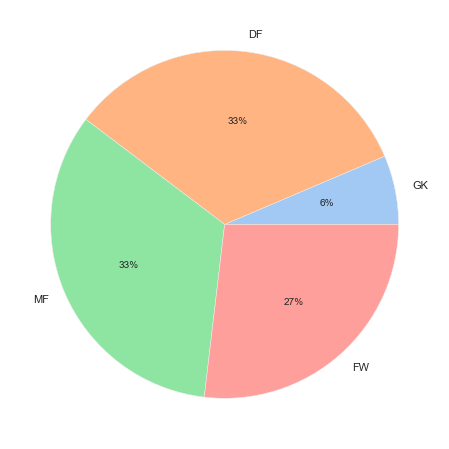

In [103]:
position = np.array([len(GK), len(DF), len(MF), len(FW)])
labels = ['GK', 'DF', 'MF', 'FW']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.pie(position, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

<div class="alert alert-block alert-info">
<b>Conclude:</b> The ratio of players playing defenders and midfielders is the same, while the striker position has a lower ratio. And the goalkeeper position occupies the least due to the specificity
</div>

> ### Statistic about Player's Age

##### *The OLDEST players*

In [40]:
data[data['Age']==data['Age'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0


Willy Cabellero of Chelsea is the oldest player in the English Premier League.

##### *The YOUNGEST players*

In [105]:
data[data['Age']==data['Age'].min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.0,0,0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,8,62.5,0,0,0.29,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0


Shola Shoretire (Manchester United), Dane Scarlett (Tottenham Hotspur), Carney Chukwuemeka (Aston Villa), Antwoine Hackford (Sheffield United) are 4 players who have the minimum Age in EPL 2020-2021

##### Distribution of player's Age in EPL 2020-2021

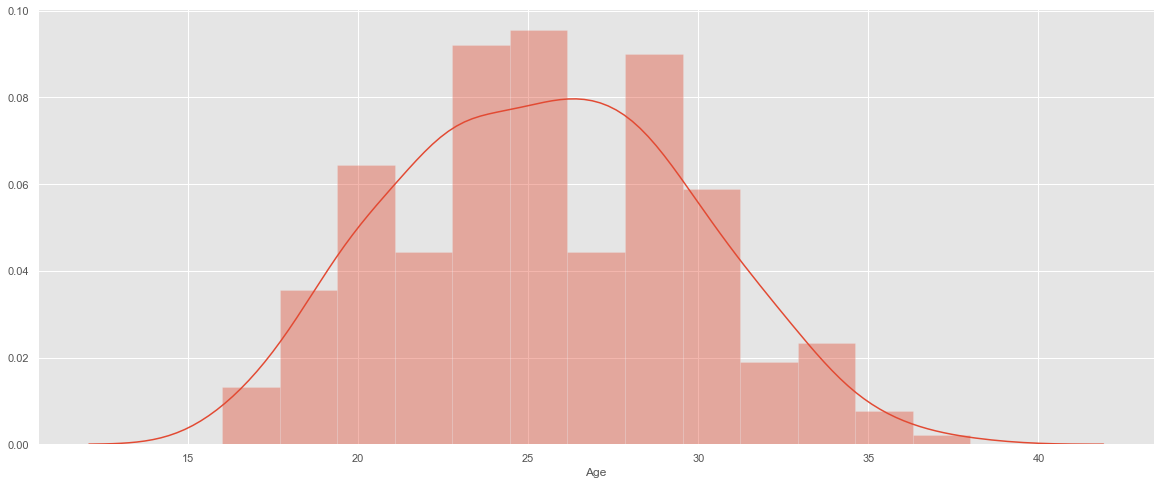

In [129]:
sns.distplot(data.Age)

<div class="alert alert-block alert-info">
<b>Conclude:</b> Density plot above shown that most players in premier league are in there mid 20's which is prime age for a footballer.
</div>

> We divide the players into ***3 groups by Age***: *below 23*, from *24 to 30* and from *31 to 40*

In [108]:
interval_age_1 = data.where(data.Age<=23)
interval_age_1 = interval_age_1.dropna()
interval_age_2 = data[(data['Age']>23) & (data['Age']<=30)]
interval_age_2 = interval_age_2.dropna()
interval_age_3 = data[(data['Age']>30) & (data['Age']<=40)]
interval_age_3 = interval_age_3.dropna()

In [110]:
print("Number of Players under (equal) the age of 23 is", len(interval_age_1))
print("Number of Players who are in between 24 and 30 is", len(interval_age_2))
print("Number of Players over 30 is", len(interval_age_3))

Number of Players under (equal) the age of 23 is 186
Number of Players who are in between 24 and 30 is 275
Number of Players over 30 is 71


##### Visualize the ratio of players by 4 Age interval

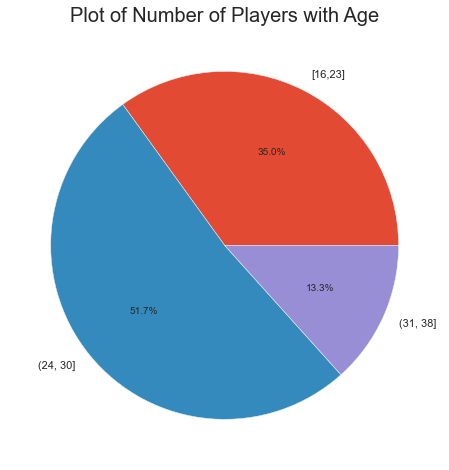

In [111]:
list_age = np.array([interval_age_1['Name'].count(), interval_age_2['Name'].count(), interval_age_3['Name'].count()])
mylabels = ["[16,23]", "(24, 30]", "(31, 38]"]
plt.title('Plot of Number of Players with Age',fontsize = 20)
plt.pie(list_age, labels = mylabels, autopct="%.1f%%")
plt.show()

<div class="alert alert-block alert-info">
<b>Conclude:</b> The fact that 86.7% of players are under the age of 30 (35% under the age of 23, 51.7% between the ages of 24 and under 30) shows that the EPL is a very attractive league with a combination of young players and players who are at the "ripe" age of their careers
</div>

#### *Age interval of each Club's players*

Text(0.5, 1.0, 'Plot of Age range for each Club')

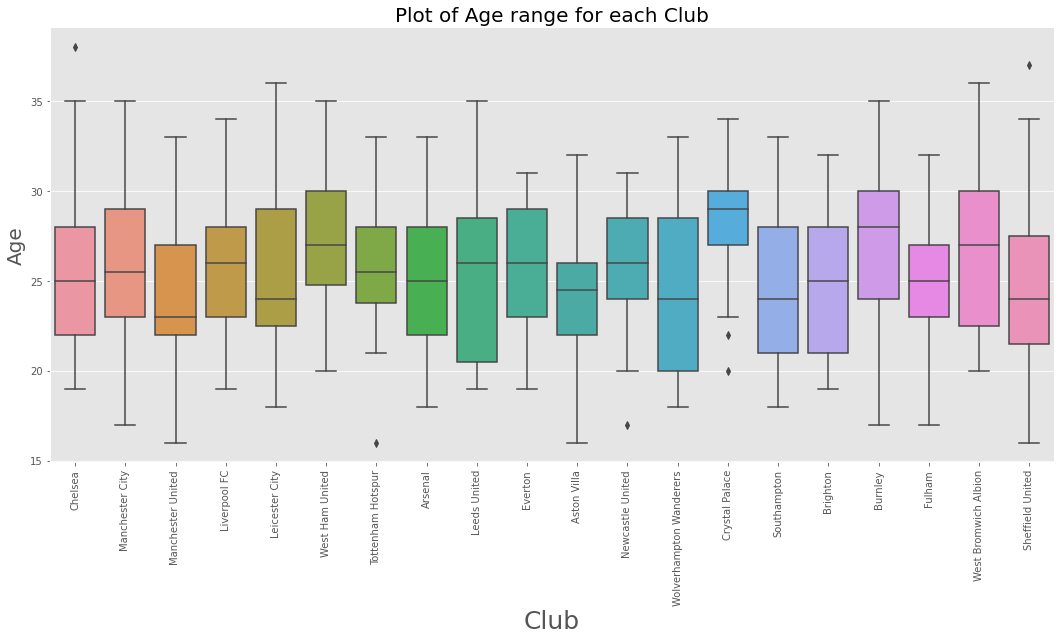

In [45]:
plt.figure(figsize=(18,8))
box_plot = sns.boxplot(x='Club',y='Age', data=data)
box_plot.set_xlabel("Club", fontsize=25)
box_plot.set_ylabel("Age", fontsize=20)
plt.xticks(rotation=90)
plt.title('Plot of Age range for each Club', fontsize=20)

<div class="alert alert-block alert-info">
<b>Conclude:</b> Burnley, Crystal Palace, West Ham, West Brom are 4 clubs has the eldest players percentile and Tottenham Hotspur has the youngest player in their squad as well as their eldest player is around 26-27 years old. Machester United's average player age is also the lowest amongst all the clubs in Premier League.
</div>

> ### Data Entry Errors
> Perc_Passes_Completed column : There are some values with -1 % , which is not reasonable value.

In [121]:
data[data.Perc_Passes_Completed==-1]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0


##### -1.0 are replaced by 0.0

In [122]:
data.Perc_Passes_Completed.replace({-1: 0}, inplace=True)
print(data.Perc_Passes_Completed[data.Name=='Dane Scarlett'])

182    0.0
Name: Perc_Passes_Completed, dtype: float64


The played time was so short (1 min) that these 2 players couldn't make any passes

> ### Internal Transfer in EPL 2020-2021
> Players move from one EPL club to another

##### *Players who play for more than 1 club*

In [123]:
data['Name'].value_counts().nlargest(8)   # because in the previous stage, we find that EPL has 528 players

Robert Snodgrass          2
Ross Barkley              2
Joe Willock               2
Theo Walcott              2
Takumi Minamino           2
Ruben Loftus-Cheek        2
Ainsley Maitland-Niles    2
Mathew Ryan               2
Name: Name, dtype: int64

##### List of players who transfered to the new club

In [48]:
x = data['Name'].value_counts().sort_values(ascending=False).nlargest(8).index.tolist()
print('Transfers: ', x)
for player in x:
    display(pd.DataFrame(data.loc[data.Name==player].reset_index(drop=True)))

Transfers:  ['Robert Snodgrass', 'Ross Barkley', 'Joe Willock', 'Theo Walcott', 'Takumi Minamino', 'Ruben Loftus-Cheek', 'Ainsley Maitland-Niles', 'Mathew Ryan']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Robert Snodgrass,West Ham United,SCO,"FW,DF",32,3,0,5,0,0,3,100.0,0,0,0.00,0.00,0,0
1,Robert Snodgrass,West Bromwich Albion,SCO,"MF,FW",32,8,6,526,0,0,133,78.9,0,0,0.03,0.06,2,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ross Barkley,Chelsea,ENG,MF,26,2,0,42,0,0,26,84.6,0,0,0.06,0.16,0,0
1,Ross Barkley,Aston Villa,ENG,MF,26,24,18,1531,3,1,764,81.0,0,0,0.19,0.21,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Joe Willock,Arsenal,ENG,MF,20,7,2,238,0,0,91,75.8,0,0,0.17,0.02,1,0
1,Joe Willock,Newcastle United,ENG,MF,20,14,11,978,8,0,235,77.0,0,1,0.33,0.07,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Theo Walcott,Everton,ENG,FW,31,1,0,13,0,0,1,100.0,0,0,0.00,0.00,0,0
1,Theo Walcott,Southampton,ENG,"MF,FW",31,21,20,1618,3,3,424,72.4,0,0,0.17,0.07,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Takumi Minamino,Liverpool FC,JPN,"MF,FW",25,9,2,293,1,0,139,79.9,0,0,0.20,0.00,0,0
1,Takumi Minamino,Southampton,JPN,"MF,FW",25,10,9,711,2,0,257,72.4,0,0,0.15,0.07,1,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0
1,Ruben Loftus-Cheek,Fulham,ENG,"MF,FW",24,30,21,1909,1,0,716,83.1,0,0,0.15,0.07,3,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ainsley Maitland-Niles,Arsenal,ENG,DF,22,11,5,490,0,0,288,78.5,0,0,0.02,0.04,0,0
1,Ainsley Maitland-Niles,West Bromwich Albion,ENG,MF,22,15,14,1230,0,0,402,76.4,0,0,0.05,0.05,2,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mathew Ryan,Arsenal,AUS,GK,28,3,3,270,0,0,67,92.5,0,0,0.0,0.0,0,0
1,Mathew Ryan,Brighton,AUS,GK,28,11,11,990,0,0,399,78.7,0,0,0.0,0.0,1,0


## Stage 3: Exploratary Data Analysis

> ### League statistic
> Statistics of EPL 2020-2021 (about some criterias, such as Goals, Assists, Passes Attempted, Penalty Goals, Penalty Attempted, Yellow Cards, Red Cards)

,Club,Goals
0,Sheffield United,19
1,Fulham,26
2,Burnley,32
3,West Bromwich Albion,33
4,Wolverhampton Wanderers,34
5,Brighton,39
6,Crystal Palace,39
7,Newcastle United,44
8,Everton,45
9,Southampton,47


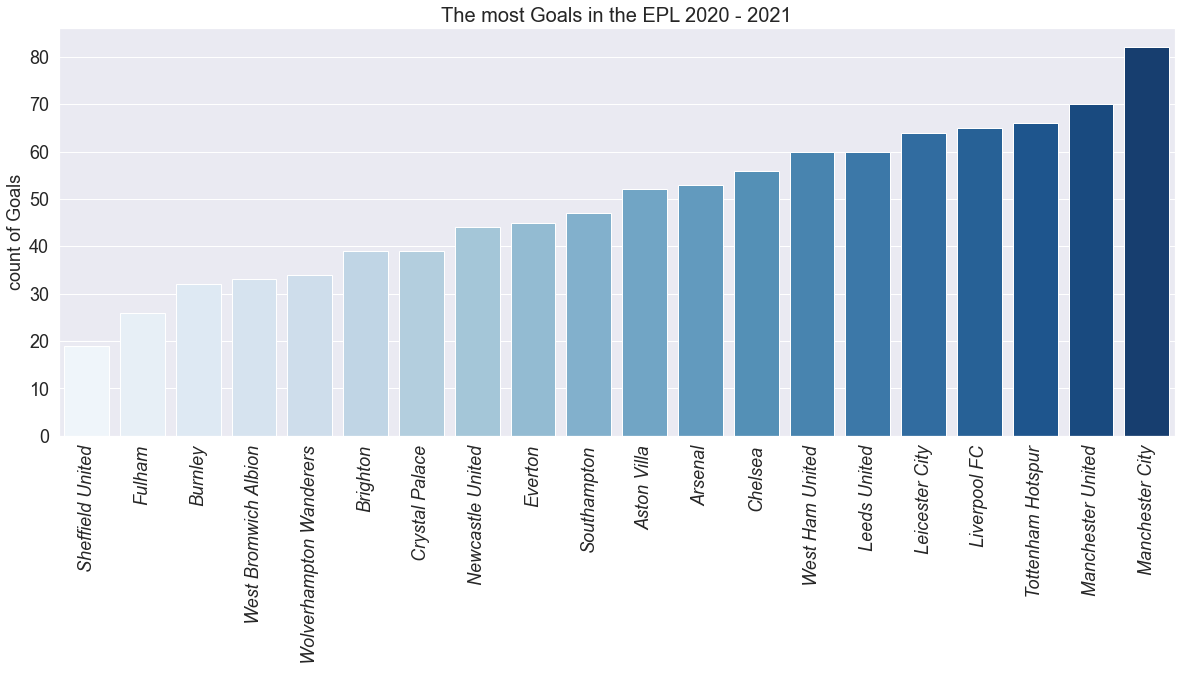

,Club,Assists
0,Sheffield United,13
1,Fulham,18
2,West Bromwich Albion,20
3,Burnley,20
4,Wolverhampton Wanderers,21
5,Brighton,24
6,Newcastle United,26
7,Crystal Palace,29
8,Everton,32
9,Southampton,33


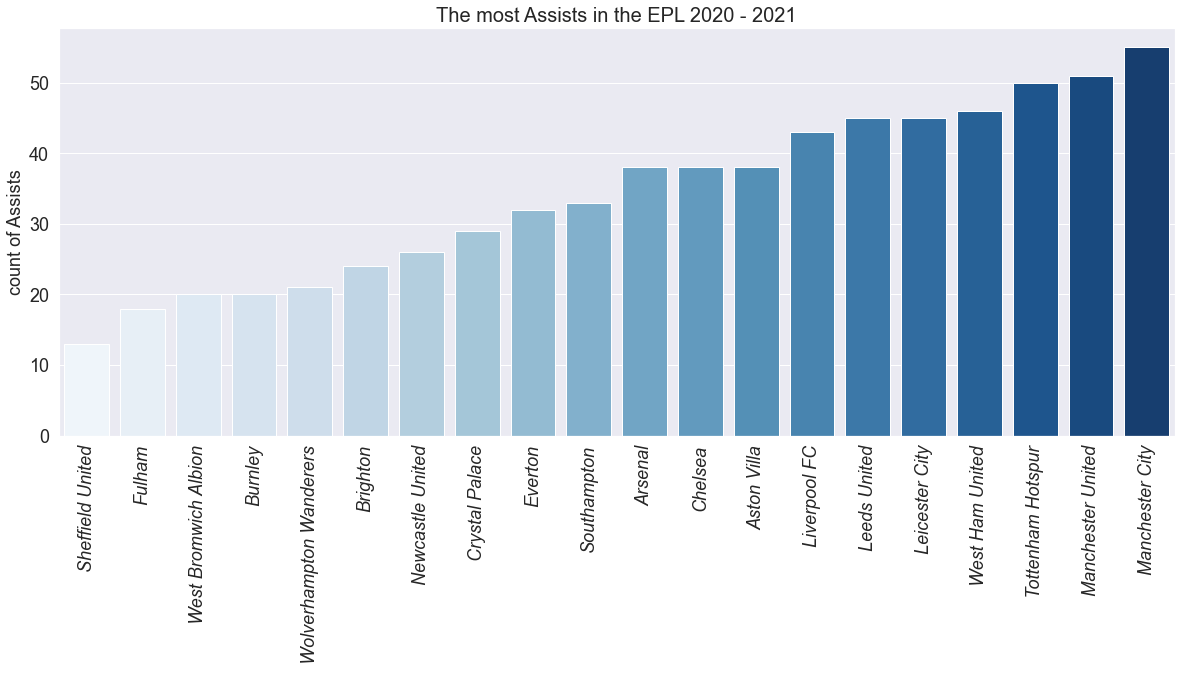

,Club,Passes_Attempted
0,West Bromwich Albion,13646
1,Newcastle United,14218
2,Burnley,15043
3,Crystal Palace,15092
4,Sheffield United,15843
5,West Ham United,16358
6,Aston Villa,16556
7,Everton,18246
8,Wolverhampton Wanderers,18661
9,Southampton,18761


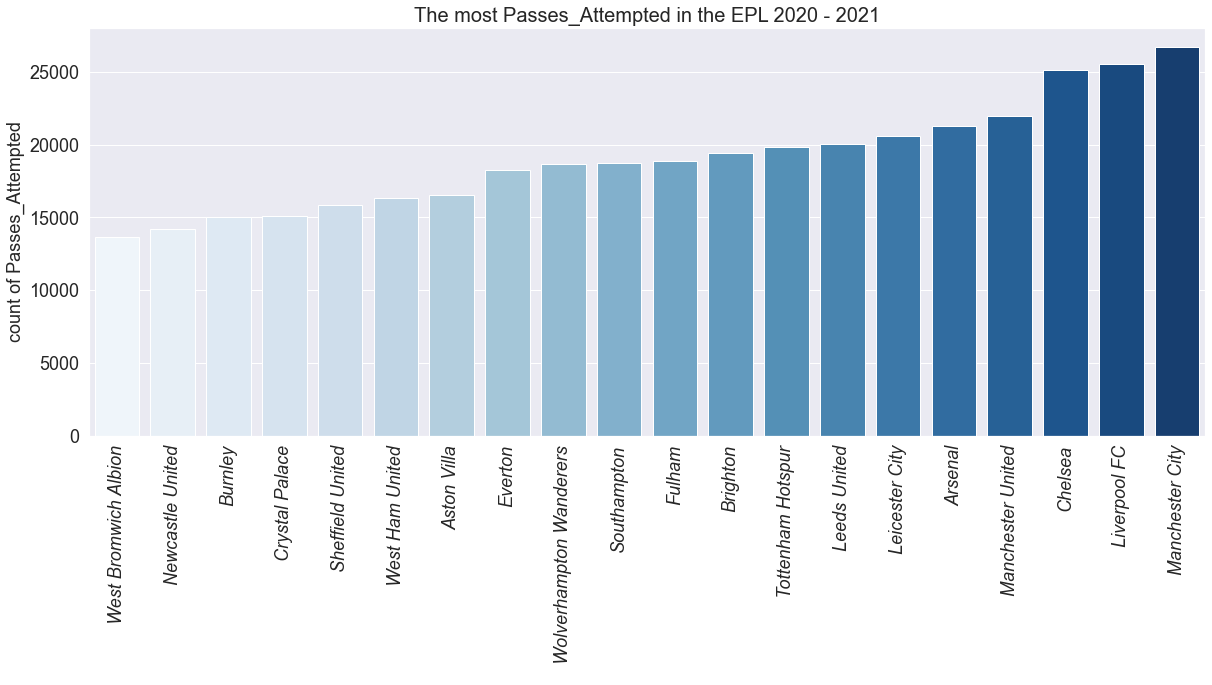

,Club,Penalty_Goals
0,West Ham United,2
1,Burnley,3
2,Crystal Palace,3
3,Fulham,3
4,Sheffield United,3
5,Wolverhampton Wanderers,4
6,West Bromwich Albion,4
7,Everton,4
8,Leeds United,4
9,Aston Villa,5


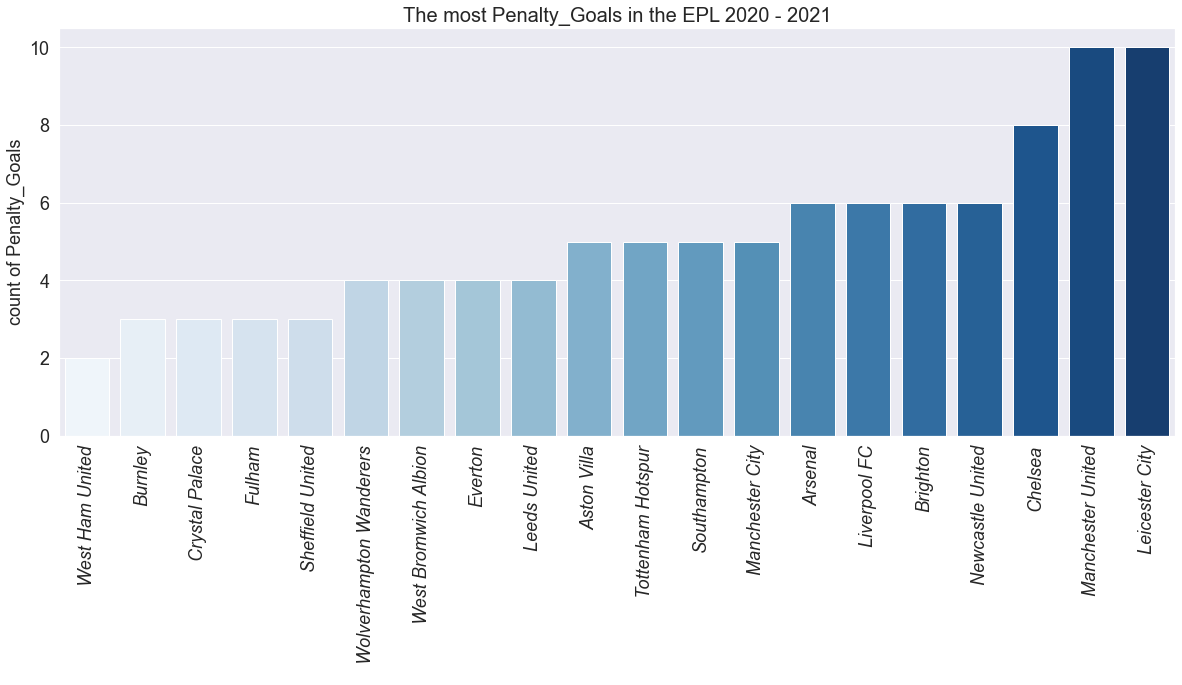

,Club,Penalty_Attempted
0,Burnley,3
1,Wolverhampton Wanderers,4
2,West Bromwich Albion,4
3,Crystal Palace,4
4,Sheffield United,4
5,Leeds United,4
6,West Ham United,4
7,Tottenham Hotspur,5
8,Everton,5
9,Southampton,6


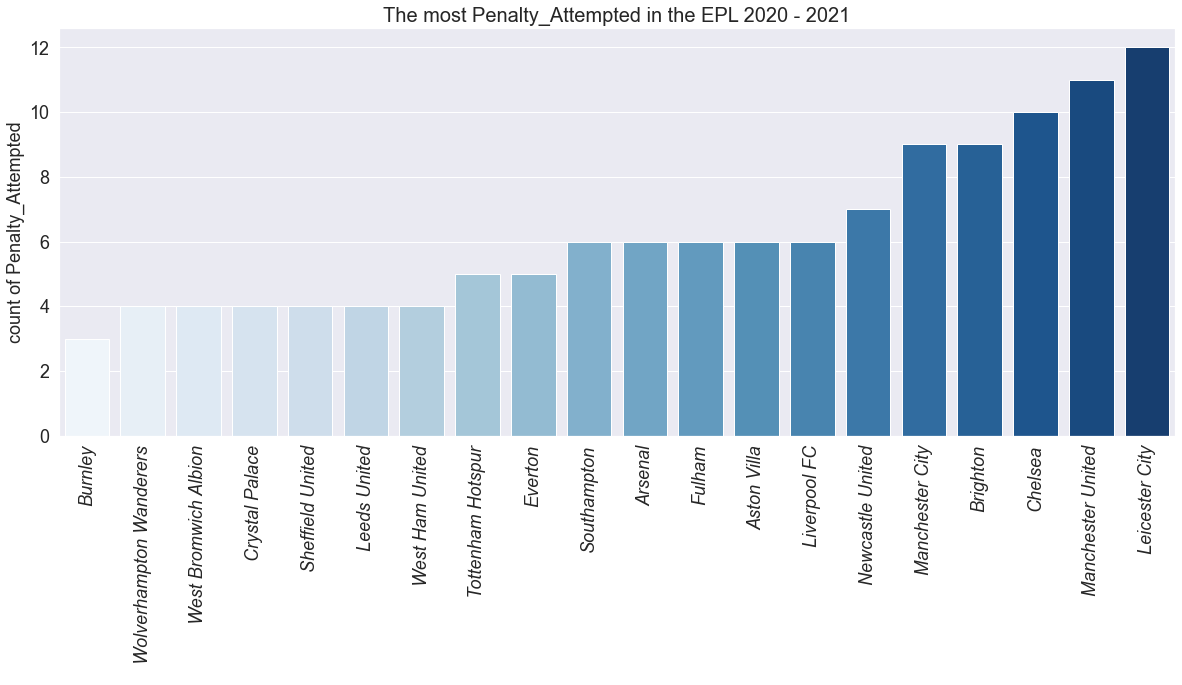

,Club,Yellow_Cards
0,Liverpool FC,40
1,Manchester City,46
2,Burnley,48
3,Arsenal,49
4,Brighton,49
5,West Ham United,50
6,West Bromwich Albion,51
7,Chelsea,51
8,Southampton,52
9,Wolverhampton Wanderers,55


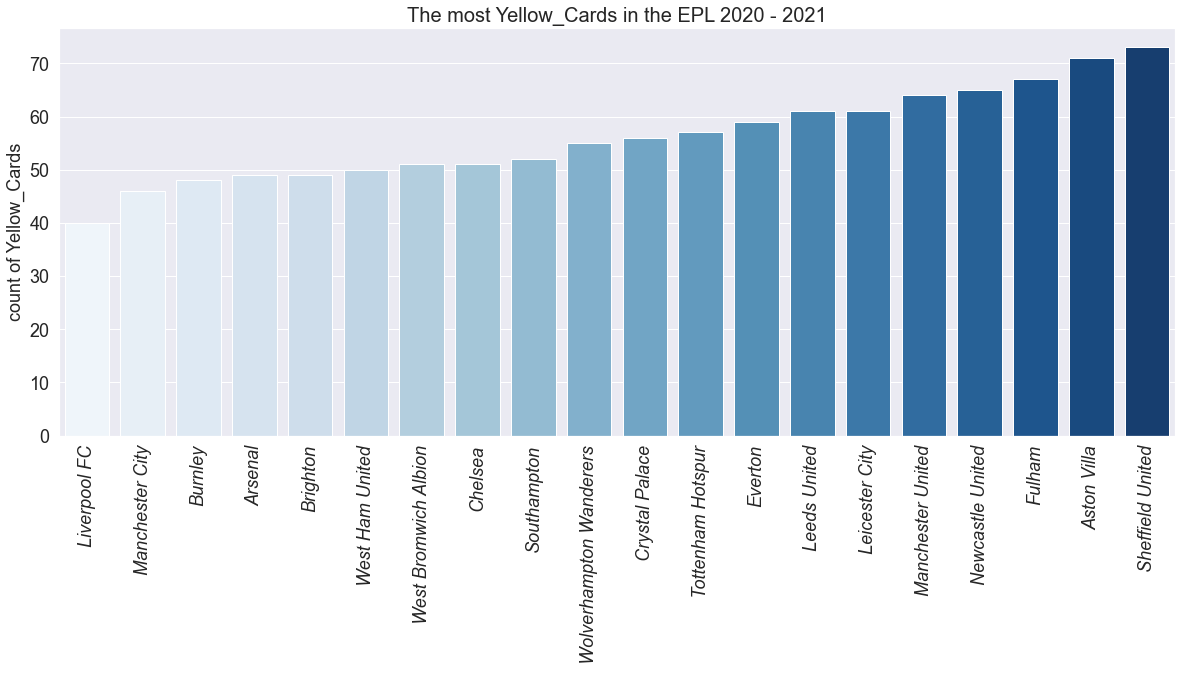

,Club,Red_Cards
0,Leicester City,0
1,Liverpool FC,0
2,Burnley,0
3,Manchester United,1
4,Leeds United,1
5,Wolverhampton Wanderers,1
6,Everton,2
7,Manchester City,2
8,Tottenham Hotspur,2
9,Crystal Palace,2


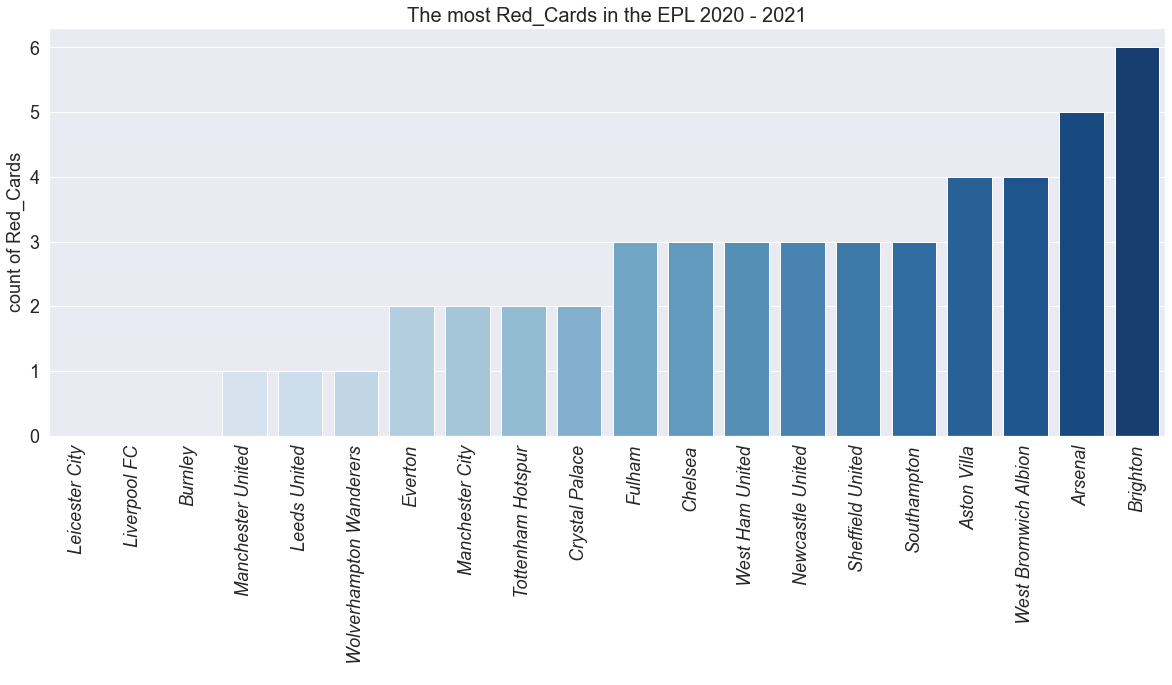

In [49]:
category = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']

for colname in category:
    x=pd.DataFrame(data.groupby(['Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=True).reset_index(drop=True))
    display(x.style.background_gradient(cmap='twilight_r'))
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Club', y=colname, data=x, palette="Blues")
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname), fontsize=20)
    plt.xlabel(' ')
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Club'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()

* Top 3 clubs with the most ***Goals*** scored (descending order): **Man City**(82), **Man United**(70) and **Tottenham**(66)
* Top 3 clubs with the most ***Assists*** created (descending order): **Manchester City**(55), **Manchester United**(51) and **Tottenham**(50)
* Top 3 clubs with the least ***Goals*** scored (ascending order): **Sheffield**(19), **Fulham**(26), **Burnley**(32)
* Top 3 clubs with the least ***Assists*** scored (ascending order): **Sheffield**(13), **Fulham**(18) and (**West Brom**, **Burnley**)(20) <br>
=> In EPL 2020-2021, the position of the teams on the rankings is strongly correlated with the attacking ability of that team (Ex: #1. Man City; #20. Sheffield)
<br>
<br>
* Top 3 clubs with the most ***Passes Attempted*** (descending order): **Man City**, **Liverpool** and **Chelsea** <br>
=> These are 3 teams played with ball control style
<br>
<br>
* Top 3 clubs with the most ***Penalty Attempted*** (descending order): **Leicester**(12), **Man United**(11) and **Chelsea**(10)                                                                                                                                
=> Compared to previous years, the number of penalties increased sharply. This can be explained by the emergence of VAR, which does not include amendments to the law  
<br>
<br>
* Top 3 ***aggressive*** clubs (determined by the number of *yellow* cards and *red* cards): **Sheffield** (73y, 3r), **Aston Villa**(71y, 3r) and **Fulham**(67y, 3r)                                                                                                                                

> ### Player statistics
> Statistics of EPL's Footballers 2020-2021 (about some criterias, such as Goals, Assists, Passes Attempted, Penalty Goals, Penalty Attempted, Yellow Cards, Red Cards)

,Name,Club,Goals
0,Anwar El Ghazi,Aston Villa,10
1,Matheus Pereira,West Bromwich Albion,11
2,Marcus Rashford,Manchester United,11
3,Sadio Mané,Liverpool FC,11
4,Gareth Bale,Tottenham Hotspur,11
5,Wilfried Zaha,Crystal Palace,11
6,Callum Wilson,Newcastle United,12
7,Danny Ings,Southampton,12
8,Chris Wood,Burnley,12
9,Kelechi Iheanacho,Leicester City,12


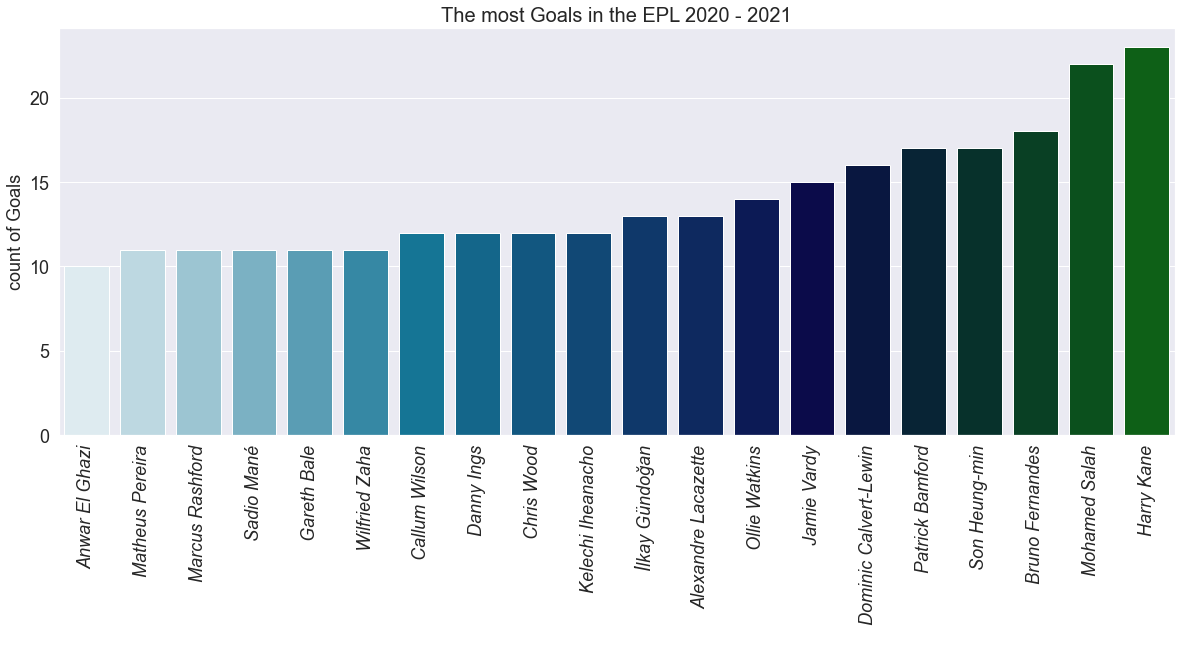

,Name,Club,Assists
0,Trent Alexander-Arnold,Liverpool FC,7
1,Roberto Firmino,Liverpool FC,7
2,Sadio Mané,Liverpool FC,7
3,Lucas Digne,Everton,7
4,Patrick Bamford,Leeds United,7
5,James Ward-Prowse,Southampton,7
6,Andrew Robertson,Liverpool FC,7
7,Raheem Sterling,Manchester City,7
8,Aaron Cresswell,West Ham United,8
9,Jack Harrison,Leeds United,8


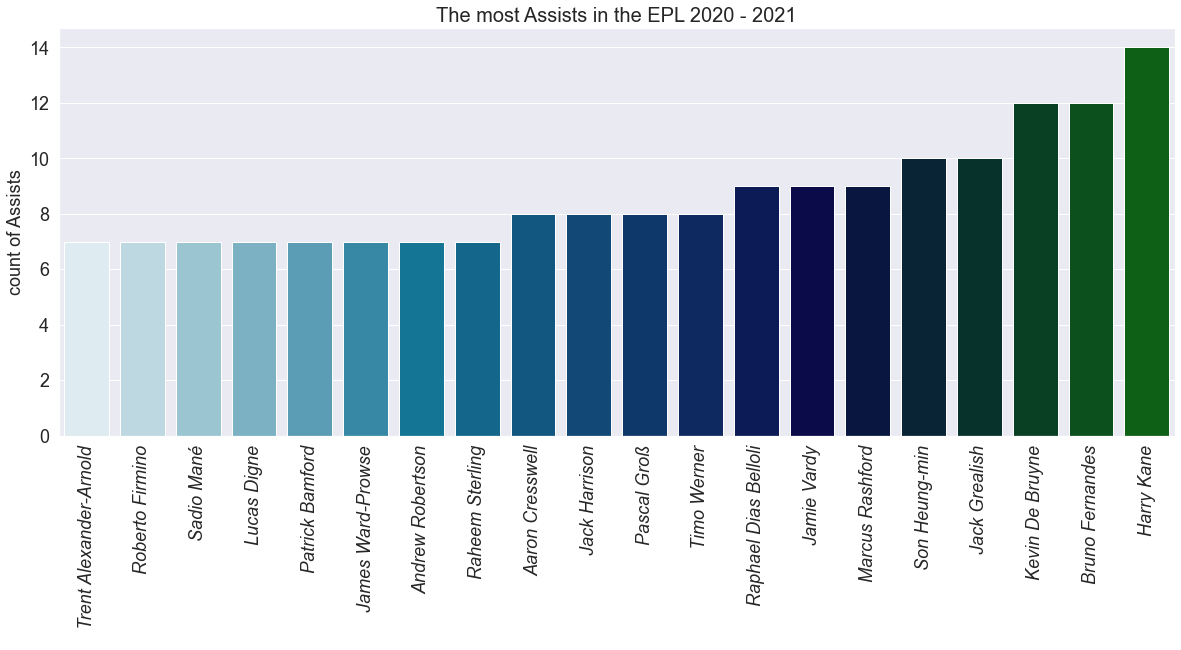

,Name,Club,Passes_Attempted
0,Luke Shaw,Manchester United,2015
1,Fabinho,Liverpool FC,2049
2,Aaron Cresswell,West Ham United,2060
3,Aaron Wan-Bissaka,Manchester United,2065
4,João Cancelo,Manchester City,2094
5,Ashley Westwood,Burnley,2125
6,Harry Maguire,Manchester United,2139
7,Matt Targett,Aston Villa,2147
8,Lewis Dunk,Brighton,2151
9,Granit Xhaka,Arsenal,2164


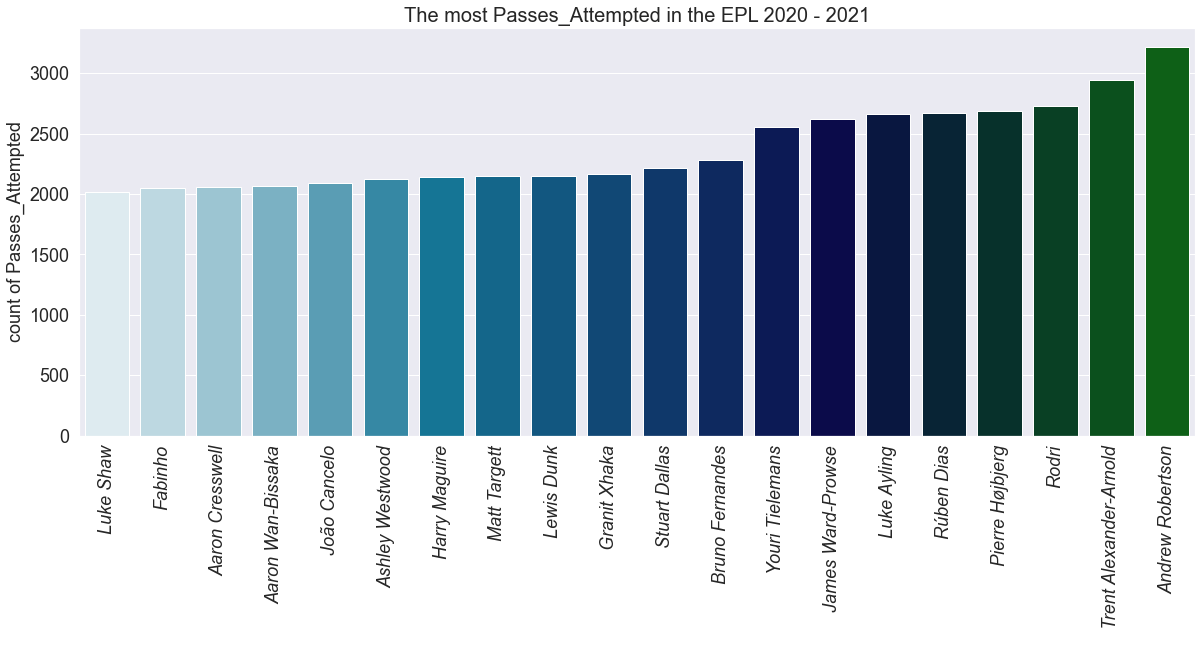

,Name,Club,Penalty_Goals
0,Patrick Bamford,Leeds United,2
1,Kevin De Bruyne,Manchester City,2
2,Pierre-Emerick Aubameyang,Arsenal,2
3,Chris Wood,Burnley,2
4,Mateusz Klich,Leeds United,2
5,Billy Sharp,Sheffield United,2
6,Pascal Groß,Brighton,3
7,James Ward-Prowse,Southampton,3
8,Rúben Neves,Wolverhampton Wanderers,3
9,Gylfi Sigurðsson,Everton,3


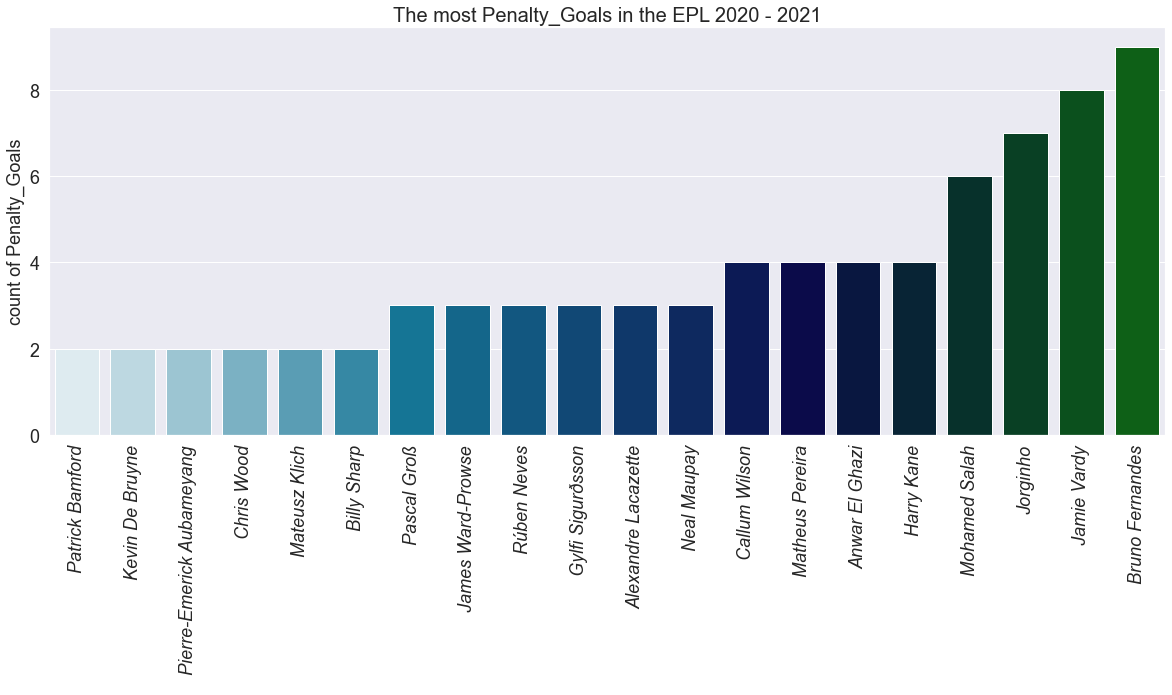

,Name,Club,Penalty_Attempted
0,Declan Rice,West Ham United,2
1,Chris Wood,Burnley,2
2,Luka Milivojević,Crystal Palace,2
3,Ollie Watkins,Aston Villa,2
4,Youri Tielemans,Leicester City,2
5,Alexandre Lacazette,Arsenal,3
6,Rúben Neves,Wolverhampton Wanderers,3
7,Kevin De Bruyne,Manchester City,3
8,Pascal Groß,Brighton,4
9,Neal Maupay,Brighton,4


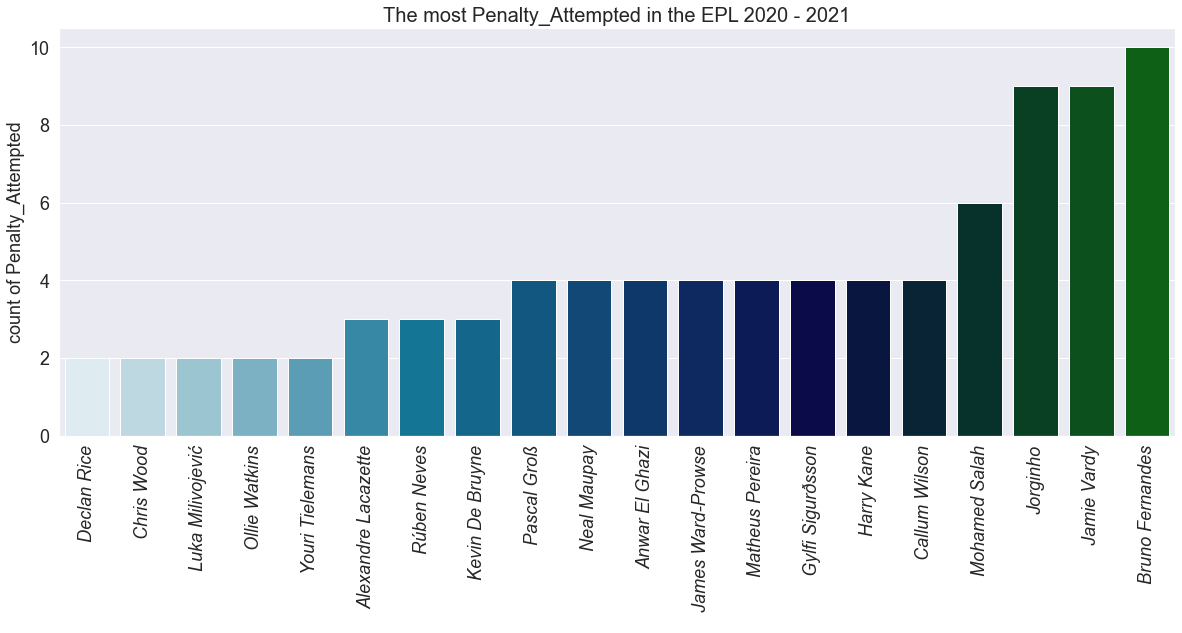

,Name,Club,Yellow_Cards
0,John Egan,Sheffield United,7
1,Joachim Andersen,Fulham,7
2,Luke Ayling,Leeds United,7
3,David McGoldrick,Sheffield United,7
4,Tomáš Souček,West Ham United,7
5,Luka Milivojević,Crystal Palace,8
6,Héctor Bellerín,Arsenal,8
7,Rúben Neves,Wolverhampton Wanderers,8
8,John Lundstram,Sheffield United,8
9,Luke Shaw,Manchester United,8


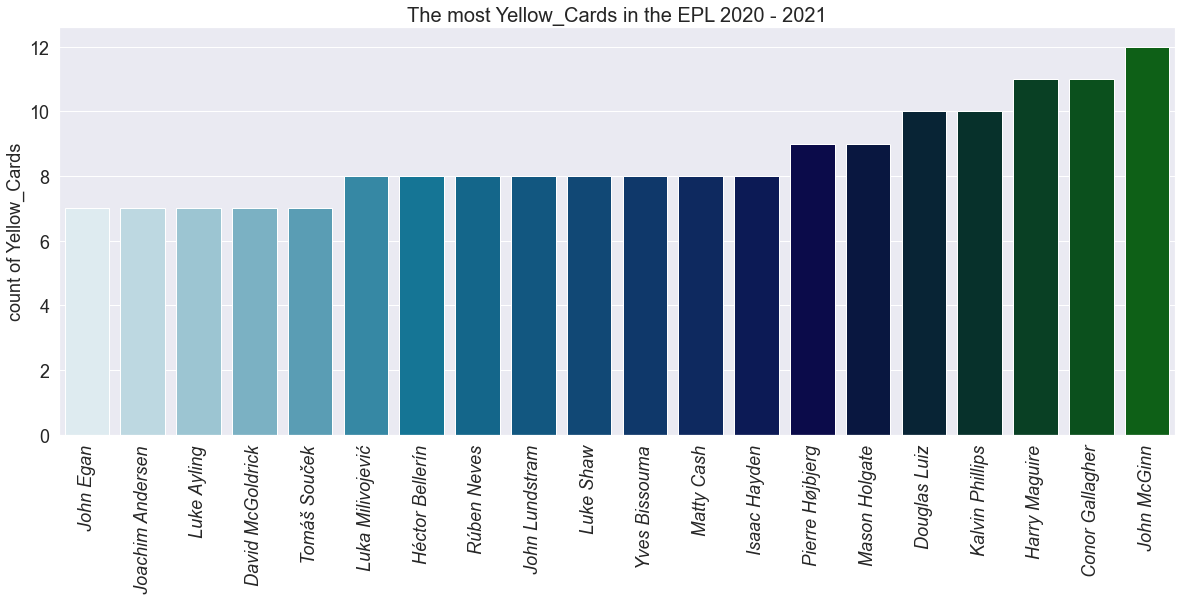

,Name,Club,Red_Cards
0,Ben White,Brighton,1
1,Tariq Lamptey,Brighton,1
2,Antonee Robinson,Fulham,1
3,Anthony Martial,Manchester United,1
4,Semi Ajayi,West Bromwich Albion,1
5,Tyrone Mings,Aston Villa,1
6,Thiago Silva,Chelsea,1
7,Richarlison,Everton,1
8,Fabián Balbuena,West Ham United,1
9,David Luiz,Arsenal,1


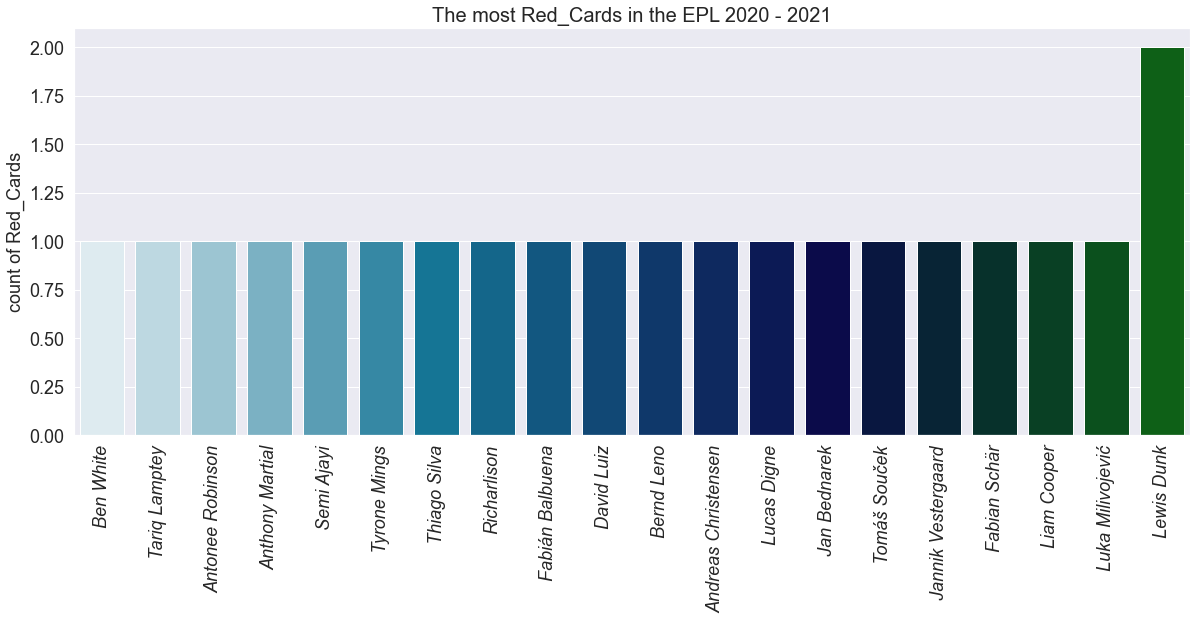

In [50]:
criteria = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']

for colname in criteria:
    x=pd.DataFrame(data.groupby(['Name','Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=True).tail(20).reset_index(drop=True))
    display(x.style.background_gradient(cmap='copper'))
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Name',y=colname,data=x,palette="ocean_r",order=x['Name'].tail(20))
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname),fontsize=20)
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Name'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()

* Top 3 players with the most ***Goals*** scored (descending order): **H.Kane**(23), **Mo Salah**(22) and **Bruno Fernandes**(18)
* Top 3 players with the most ***Assists*** created (descending order): **H.Kane**(14), **Bruno Fernandes**(12) and **De Bruyne**(12)
=> Harry Kane is the best player of the season 20-21! (contributed to the most Goals (23+14))
=> Although Man City is the champion and scores the most goals and has the most assists, only Kevin De Bruyne is the player in the top 5 players with the most assists. Not a single Man City player is in the top 5 scorers. This shows that the depth and quality of the man city squad is spread across the line positions. Every positions of Man City on the field can score or assist.
<br>
<br>
* Top 3 players with the most ***Passes Attempted*** (descending order): **A.Robertson**, **Trent Arnold** and **Rodri** <br>
=> 2 players who have the most Passes Attempted are the 2 full backs of Liverpool. This shows that Liverpool's play style is hitting the side and leverage the crossing ability of the full-back pair
<br>
<br>
* Bruno is the player who takes the most penalties and scores the most goals on the 11m spot, with an accuracy rate of 90% (9/10).
<br>
<br>
* Top 3 ***aggressive*** players (determined by the number of *yellow* cards): **McGinn**(12), **C.Gallagher**(11) and **H.Maguire**(11)     
* The ***dirtest*** player (determined by the number of *red* cards): Lewis Dunk(2)  

> ### Net goals 
> The goal comes from the *open* situation. In this dataset, we do not have information on the number of goals resulting from set-pieces (corners, free kicks, throw-ins), so net goals will be defined as follows: goals scored minus the number of goals on the 11m spot

In [51]:
data['net_goals'] = data['Goals'] - data['Penalty_Goals']

##### Plotting Net goals per club

Text(0.5, 1.0, 'Plot of Clubs vs Non penalty goals scored')

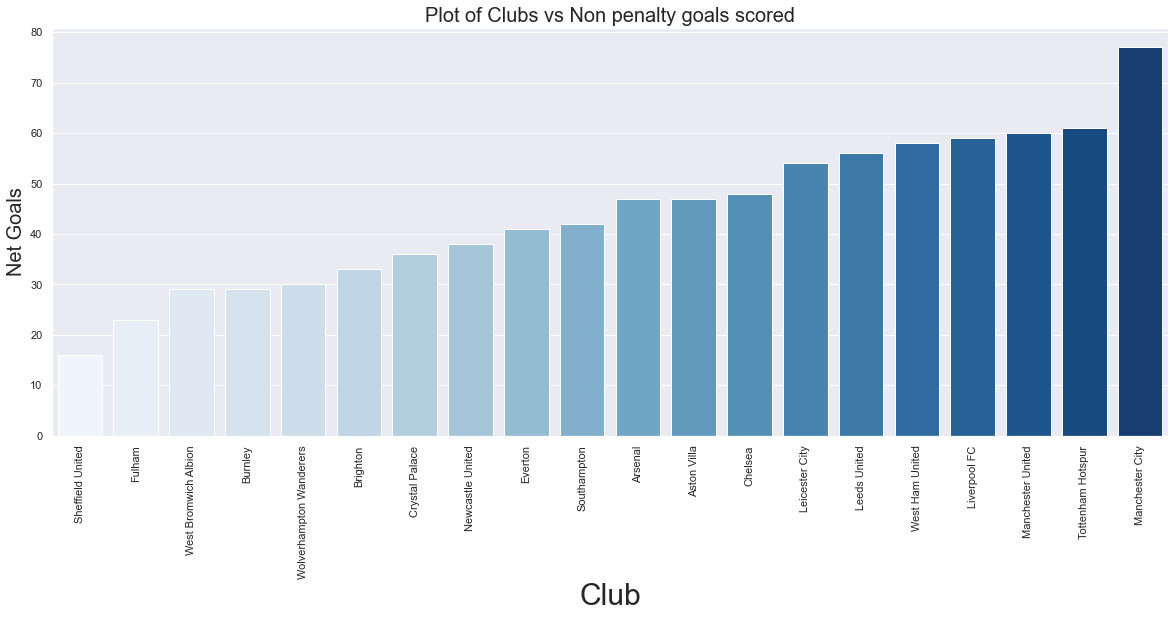

In [52]:
goals = pd.DataFrame(data.groupby('Club', as_index=False)['net_goals'].sum())
ax = sns.barplot(x='Club',y='net_goals',data=goals.sort_values(by="net_goals"), palette="Blues")
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Net Goals",fontsize=20)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Non penalty goals scored',fontsize = 20)

<div class="alert alert-block alert-info">
<b>Conclude:</b> Still them, Manchester City! This is the most effective attacking club in the Premier League.
</div>

> #### Top 10 Goal scorers (Defender)

In [53]:
data[['Name', 'Club', 'Position', 'Goals', 'Assists']][data['Position']=='DF'].sort_values(by='Goals', ascending = False)[:10]

,Name,Club,Position,Goals,Assists
397,Lewis Dunk,Brighton,DF,5,0
9,Kurt Zouma,Chelsea,DF,5,0
38,John Stones,Manchester City,DF,4,0
3,Ben Chilwell,Chelsea,DF,3,5
142,Angelo Ogbonna,West Ham United,DF,3,0
144,Craig Dawson,West Ham United,DF,3,0
235,Michael Keane,Everton,DF,3,1
479,Kyle Bartley,West Bromwich Albion,DF,3,1
373,Jannik Vestergaard,Southampton,DF,3,0
323,Romain Saïss,Wolverhampton Wanderers,DF,3,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

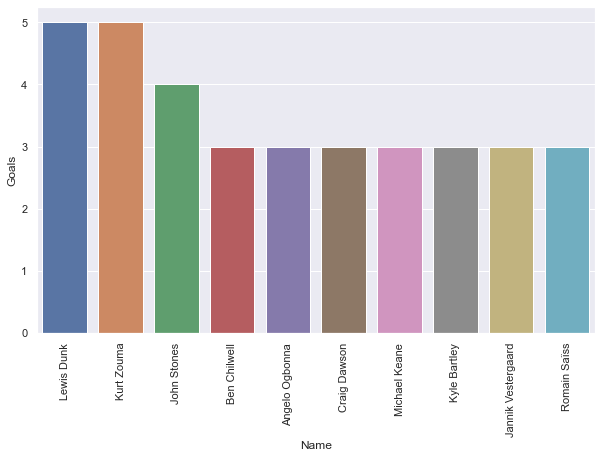

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Goals', data=data[data['Position']=='DF'].sort_values(by='Goals', ascending=False)[:10])
plt.xticks(rotation=90)

<div class="alert alert-block alert-info">
<b>Conclude:</b> Dunk and Zouma are 2 central backs, scoring 5 goals. This shows that these are two central backs with good aerial combat ability and effective attack when in the 16.50m area (Ex: From corner kick)
</div>

> #### Top 10 Defenders with the most Assists

In [55]:
data[['Name', 'Club', 'Position', 'Goals', 'Assists']][data['Position']=='DF'].sort_values(by='Assists', ascending = False)[:10]

,Name,Club,Position,Goals,Assists
136,Aaron Cresswell,West Ham United,DF,0,8
82,Trent Alexander-Arnold,Liverpool FC,DF,2,7
239,Lucas Digne,Everton,DF,0,7
138,Vladimír Coufal,West Ham United,DF,0,7
80,Andrew Robertson,Liverpool FC,DF,1,7
55,Luke Shaw,Manchester United,DF,1,5
3,Ben Chilwell,Chelsea,DF,3,5
52,Aaron Wan-Bissaka,Manchester United,DF,2,4
167,Serge Aurier,Tottenham Hotspur,DF,2,3
31,João Cancelo,Manchester City,DF,2,3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

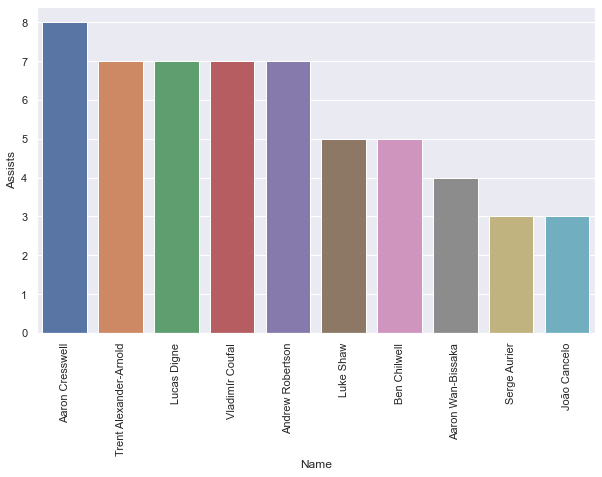

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Assists', data=data[data['Position']=='DF'].sort_values(by='Assists', ascending = False)[:10])
plt.xticks(rotation=90)

<div class="alert alert-block alert-info">
<b>Conclude:</b> These 10 players are full backs of up-half clubs in EPL 2020-2021. These assists mostly come from crossing and penetrations into the 16.50m area
</div>

In [ ]:
These 10 players are full backs of up-half clubs in EPL 2020-2021. These assists mostly come from crossing and penetrations into the 16.50m area

> #### Top 10 players with the highest passing accuracy in matches (only players who have played more than 10 games)

In [57]:
pass_acc = data[(data['Position'] != 'GK') & (data['Matches']>= 10)]
pass_acc[['Name', 'Club', 'Passes_Attempted', 'Perc_Passes_Completed']].nlargest(10, 'Perc_Passes_Completed')

,Name,Club,Passes_Attempted,Perc_Passes_Completed
38,John Stones,Manchester City,1713,94.3
28,Rúben Dias,Manchester City,2671,93.6
8,Thiago Silva,Chelsea,1871,93.5
195,Mohamed Elneny,Arsenal,1003,93.4
83,Georginio Wijnaldum,Liverpool FC,1747,93.3
45,Nathan Aké,Manchester City,755,93.0
14,Andreas Christensen,Chelsea,1089,92.8
42,Aymeric Laporte,Manchester City,1261,92.0
9,Kurt Zouma,Chelsea,1720,91.9
29,Rodri,Manchester City,2728,91.5


<div class="alert alert-block alert-info">
<b>Conclude:</b> Top 3 players with the most accurate passing rate are John Stones (Man City - 94.3%), Rúben Dias (Man City - 93.6%) and Thiago Silva (Chelsea - 93.5%). In this list, there are 5 players of Man City and 3 players of Chelsea. All of them are defensive players. This shows that these 2 teams pursue a ball-control game and play with build-from-back style. These are also the 2 teams that have reached the Champions League final. 
</div>

> ## Go deeply
> To conduct further analysis, we manipulate some new columns and focus on some important indicators

* **Goal_involvement** - Total Goals involvement of player which is sum of 'Goals' and 'Assists'.
* **min_per_goal_inv** - Minutes taken by a player per goal invovement in the league.
* **expected_goal_inv** - expected goal involvement is the sum of expected goal per match(xG) and expected assist per match(xA) multiiplied by total full matches played by player which inturn is equal to total minutes played divided by 90.
* **min_per_exp_goal_inv** - Minutes taken by a player per expected goal invovement in the league.

In [58]:
efficiency=data[['Name','Club', 'Mins', 'Goals', 'Assists', 'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA']]
efficiency['Goal_involvement'] = efficiency['Goals'] + efficiency['Assists']
efficiency['min_per_goal_inv'] = efficiency['Mins']/efficiency['Goal_involvement']
efficiency['expected_goal_inv'] = (efficiency['xG'] + data['xA'])*(efficiency['Mins']/90)
efficiency['min_per_exp_goal_inv'] = data['Mins']/efficiency['expected_goal_inv']
efficiency.replace([np.inf, -np.inf], np.nan, inplace=True)
efficiency.head()

<ipython-input-58-522d196ef4d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficiency['Goal_involvement'] = efficiency['Goals'] + efficiency['Assists']
<ipython-input-58-522d196ef4d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficiency['min_per_goal_inv'] = efficiency['Mins']/efficiency['Goal_involvement']
<ipython-input-58-522d196ef4d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,Name,Club,Mins,Goals,Assists,Penalty_Goals,Penalty_Attempted,xG,xA,Goal_involvement,min_per_goal_inv,expected_goal_inv,min_per_exp_goal_inv
0,Mason Mount,Chelsea,2890,6,5,1,1,0.21,0.24,11,262.727273,14.450000,200.000000
1,Edouard Mendy,Chelsea,2745,0,0,0,0,0.00,0.00,0,NaN,0.000000,NaN
2,Timo Werner,Chelsea,2602,6,8,0,0,0.41,0.21,14,185.857143,17.924889,145.161290
3,Ben Chilwell,Chelsea,2286,3,5,0,0,0.10,0.11,8,285.750000,5.334000,428.571429
4,Reece James,Chelsea,2373,1,2,0,0,0.06,0.12,3,791.000000,4.746000,500.000000


> ### Goal Involvement Efficiency

In [59]:
top_players_1 = efficiency[['Name','Club', 'Goals', 'Assists', 'Goal_involvement', 'expected_goal_inv' ]].sort_values(by="Goal_involvement", ascending=False)[:10]
top_players_1.head()

,Name,Club,Goals,Assists,Goal_involvement,expected_goal_inv
162,Harry Kane,Tottenham Hotspur,23,14,37,28.080444
51,Bruno Fernandes,Manchester United,18,12,30,26.513667
81,Mohamed Salah,Liverpool FC,22,5,27,27.018000
161,Son Heung-min,Tottenham Hotspur,17,10,27,19.376000
110,Jamie Vardy,Leicester City,15,9,24,24.613333


In [60]:
efficiency[['Name', 'xG', 'xA', 'Goal_involvement', 'expected_goal_inv']].sort_values(by="expected_goal_inv", ascending=False)[:10].head()

,Name,xG,xA,Goal_involvement,expected_goal_inv
162,Harry Kane,0.60,0.22,37,28.080444
81,Mohamed Salah,0.61,0.18,27,27.018000
51,Bruno Fernandes,0.45,0.32,30,26.513667
110,Jamie Vardy,0.62,0.16,24,24.613333
214,Patrick Bamford,0.51,0.12,24,21.350000


##### Visualize to see the difference between Goal involvement and Expected Goal involvement

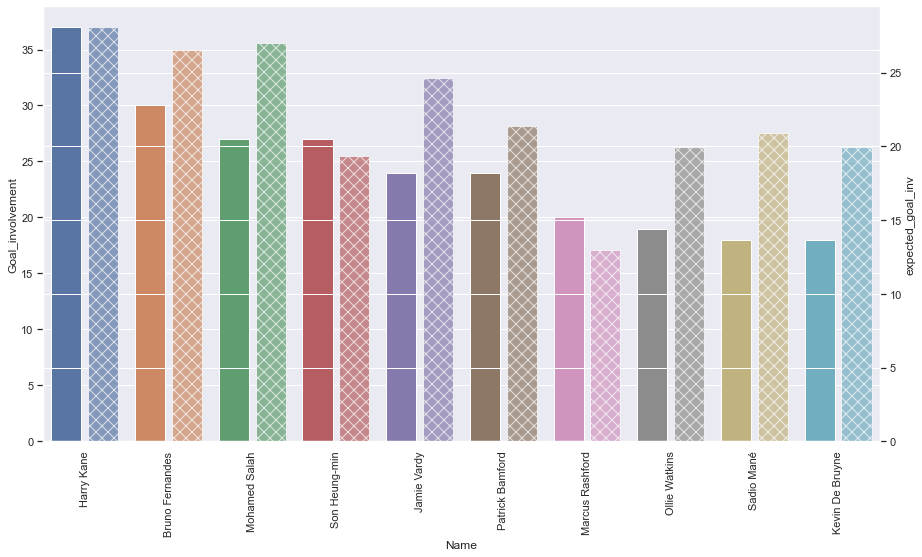

In [61]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Name', y='Goal_involvement', data=top_players_1)
width_scale = 0.45
plt.xticks(rotation=90)
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

ax2 = ax.twinx()
sns.barplot(x='Name', y='expected_goal_inv', data=top_players_1, alpha=0.7, hatch='xx', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)

plt.show()

<div class="alert alert-block alert-info">
<b>Conclude:</b> Harry Kane, Son Heung-min and Marcus Rashford are the top 3 players who had more Goal Involvement than expected among the top attacking players. These 3 players are effective in front of goal (high chance to goal conversion rate).
</div>

> ### Minutes Per Goal Involvement Efficiency

In [63]:
top_players_2 = efficiency[['Name', 'Club', 'Mins', 'min_per_goal_inv', 'min_per_exp_goal_inv']][efficiency['Mins']>1000].sort_values(by="min_per_goal_inv")[:10]
top_players_2.head()

,Name,Club,Mins,min_per_goal_inv,min_per_exp_goal_inv
162,Harry Kane,Tottenham Hotspur,3082,83.297297,109.756098
51,Bruno Fernandes,Manchester United,3099,103.300000,116.883117
120,Kelechi Iheanacho,Leicester City,1459,104.214286,136.363636
63,Edinson Cavani,Manchester United,1375,105.769231,138.461538
145,Jesse Lingard,West Ham United,1421,109.307692,219.512195


In [64]:
efficiency[['Name', 'Club', 'Mins', 'min_per_goal_inv', 'min_per_exp_goal_inv']][efficiency['Mins']>1000].sort_values(by="min_per_exp_goal_inv")[:10].head()

,Name,Club,Mins,min_per_goal_inv,min_per_exp_goal_inv
34,Kevin De Bruyne,Manchester City,1997,110.944444,100.000000
162,Harry Kane,Tottenham Hotspur,3082,83.297297,109.756098
81,Mohamed Salah,Liverpool FC,3078,114.000000,113.924051
110,Jamie Vardy,Leicester City,2840,118.333333,115.384615
51,Bruno Fernandes,Manchester United,3099,103.300000,116.883117


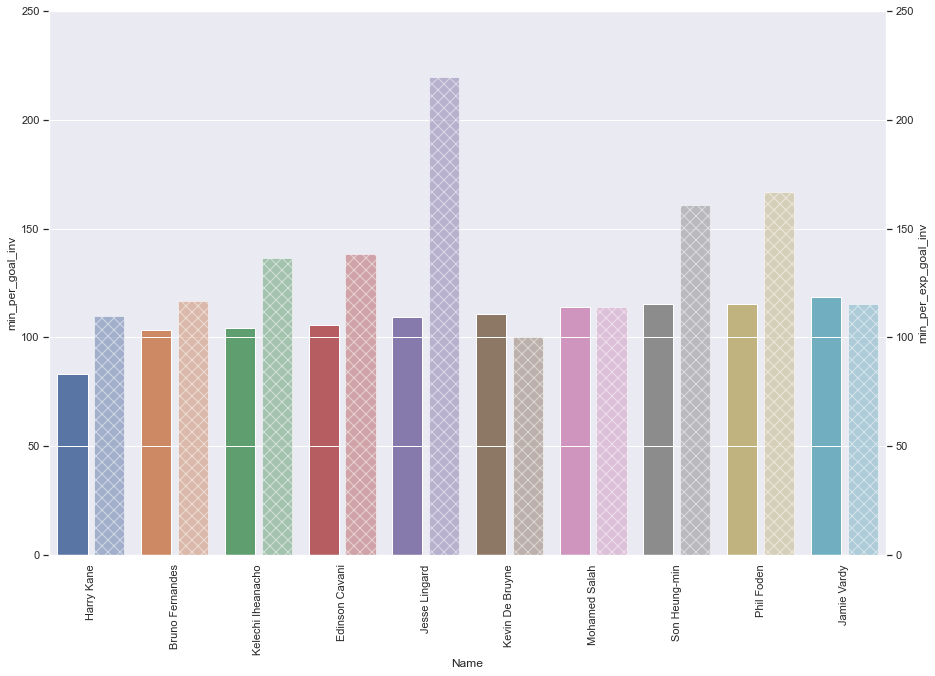

In [66]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Name', y='min_per_goal_inv', data=top_players_2)
width_scale = 0.45
plt.xticks(rotation=90)
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
ax.set_ylim(0, 250)

ax2 = ax.twinx()
sns.barplot(x='Name', y='min_per_exp_goal_inv', data=top_pla, alpha=0.5, hatch='xx', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
ax2.set_ylim(0, 250)

plt.show()

<div class="alert alert-block alert-info">
<b>Conclude:</b> Jesse Lingard transfered from Man United in winter transfer market (loan contract). In West Ham, he often start for the first team and has more opportunities to prove his ability. He has the biggest diference between the minutes per Goal Involvement and expected Goal Involvement. He took the least minutes per Goal Involvement in comparision to the expectation. So Jesse Lingard was most efficient attacking player when looked in terms of minutes taken per Goal Involvement.
</div>

> #### Average xG per 90 minutes (for players who played more than 10 games)

In [157]:
xG_90 = data[data['Matches']>10]
fig = px.scatter(xG_90, x="xG", y="Goals",trendline="ols",hover_data=['Name','Club'])

fig.update_layout(
    title={
        'text': "xG per90 to Goal (For players who played over 10 games)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font_family="Calibri",
    title_font_family="Times New Roman"
)
fig.show()

<div class="alert alert-block alert-info">
<b>Conclude:</b> Kane, Son, Bruno, Salah, Bamford are the most dangerous players in EPL 2020-2021.
</div>

> #### Average xA per 90 minutes (for players who played more than 10 games)

In [67]:
xA_90 = data[data['Matches']>10]
fig = px.scatter(xA_90, x="xA", y="Assists",trendline="ols",hover_data=['Name','Club'])

fig.update_layout(
    title={
        'text': "xA per90 to Assists (For players who played over 10 games)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font_family="Calibri",
    title_font_family="Times New Roman"
)
fig.show()

<div class="alert alert-block alert-info">
<b>Conclude:</b> Kane, De Bruyne, Bruno, Son and Grealish are the top 5 players capable of creating good chances for teammates at EPL
</div>

> ### Top 10 Sub-players
> Players who often enter from the bench

In [68]:
data['Subbed_On'] = data['Matches'] - data['Starts']
data = data[data['Subbed_On']>0].sort_values('Subbed_On', ascending=False)
data[['Name', 'Club', 'Matches', 'Starts', 'Subbed_On', 'Mins']].head(10)

,Name,Club,Matches,Starts,Subbed_On,Mins
329,Fábio Silva,Wolverhampton Wanderers,32,11,21,1369
436,Jay Rodriguez,Burnley,31,12,19,1265
180,Érik Lamela,Tottenham Hotspur,23,5,18,717
497,Hal Robson-Kanu,West Bromwich Albion,19,2,17,561
170,Lucas Moura,Tottenham Hotspur,30,14,16,1411
147,Saïd Benrahma,West Ham United,30,14,16,1391
280,Jacob Ramsey,Aston Villa,22,6,16,626
93,James Milner,Liverpool FC,26,11,15,1070
414,Alireza Jahanbakhsh,Brighton,21,6,15,528
70,Donny van de Beek,Manchester United,19,4,15,524


> ### Big 4 further analysis
> Big 4 includes Manchester City, Manchester United, Liverpool and Chelsea

##### Graph of the number of goals scored by each player (compared to the whole team)

In [170]:
def top_scorers_of_club(x):
    df=data[data["Club"]==x]
    plt.figure(figsize=(10,5))
    sns.barplot(x="Name",y="Goals", data=df)
    plt.xticks(rotation=90)
    plt.show()

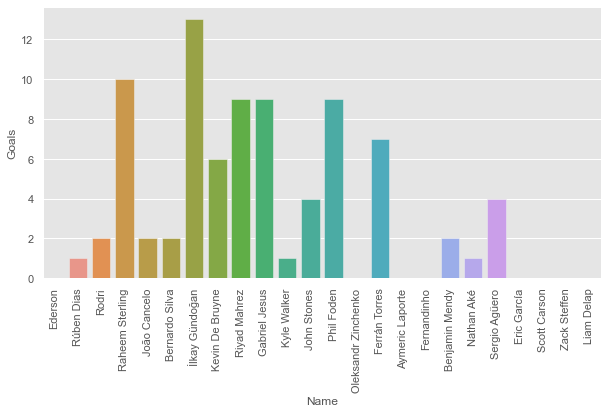

In [171]:
top_scorers_of_club('Manchester City')

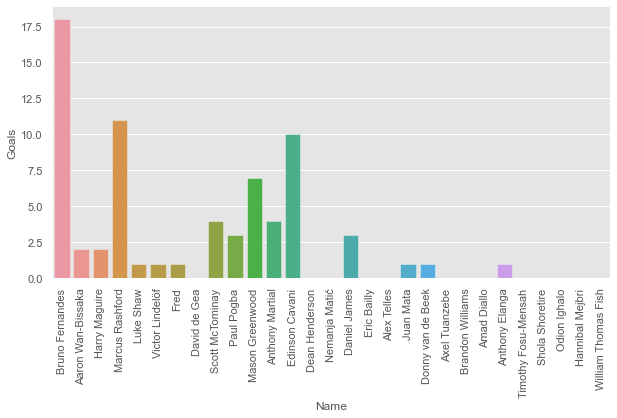

In [172]:
top_scorers_of_club('Manchester United')

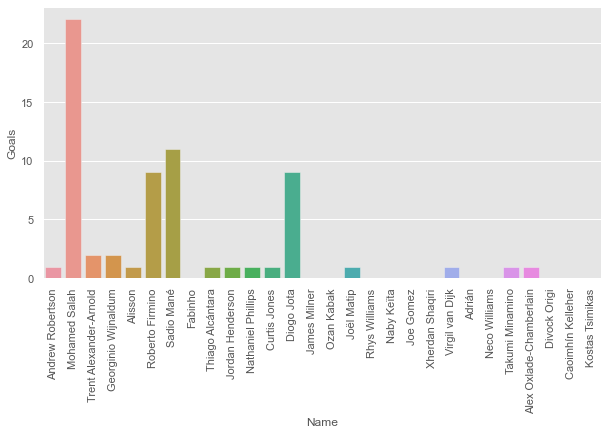

In [167]:
top_scorers_of_club('Liverpool FC')

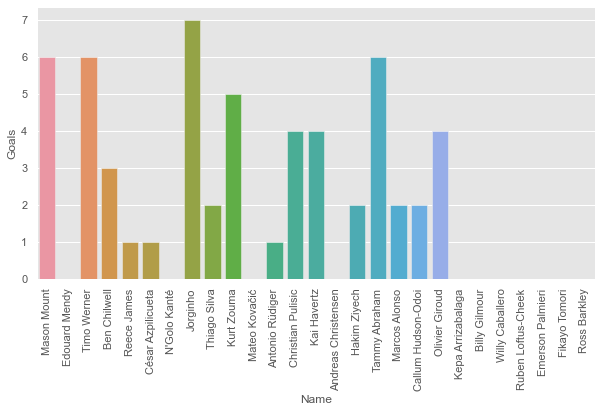

In [168]:
top_scorers_of_club('Chelsea')

* The number of goals **Man City** and **Chelsea** divided among many players. They are not too dependent on one attack player. The two strikers of Man city and Chelsea, respectively, **G. Jesus** (9 goals) and **Tammy Abraham** (6 goals) did not contribute too much and the number of goals for the whole team. This shows that they should strengthen the position of the striker to improve the quality of the squad and lead the attack
* **Bruno** (18 goals) and **Mo Salah** (27 goals) are the 2 most important players in the attack of **Man United** and **Liverpool**. The number of goals scored by these 2 players has a relatively large difference with the player ranked behind

##### Attack Statistics about Top scorers of EPL 2020-2021

In [152]:
def stats_of_top_scorers(x):
    df=data[data["Club"]==x]
    df_club=df.sort_values(by=['Goals'],ascending=False)[['Name','Nationality','Goals','Assists','xG','xA']].head(5).style.background_gradient()
    return df_club

In [153]:
stats_of_top_scorers('Manchester City')

,Name,Nationality,Goals,Assists,xG,xA
33,İlkay Gündoğan,GER,13,2,0.400000,0.200000
30,Raheem Sterling,ENG,10,7,0.430000,0.170000
39,Phil Foden,ENG,9,5,0.310000,0.230000
35,Riyad Mahrez,ALG,9,6,0.260000,0.270000
36,Gabriel Jesus,BRA,9,4,0.380000,0.150000


In [154]:
stats_of_top_scorers('Manchester United')

,Name,Nationality,Goals,Assists,xG,xA
51,Bruno Fernandes,POR,18,12,0.450000,0.320000
54,Marcus Rashford,ENG,11,9,0.290000,0.110000
63,Edinson Cavani,URU,10,3,0.480000,0.170000
61,Mason Greenwood,ENG,7,2,0.370000,0.090000
59,Scott McTominay,SCO,4,1,0.090000,0.040000


In [155]:
stats_of_top_scorers('Liverpool FC')

,Name,Nationality,Goals,Assists,xG,xA
81,Mohamed Salah,EGY,22,5,0.610000,0.180000
86,Sadio Mané,SEN,11,7,0.490000,0.180000
85,Roberto Firmino,BRA,9,7,0.400000,0.200000
92,Diogo Jota,POR,9,0,0.530000,0.130000
82,Trent Alexander-Arnold,ENG,2,7,0.080000,0.240000


In [156]:
stats_of_top_scorers('Chelsea')

,Name,Nationality,Goals,Assists,xG,xA
7,Jorginho,ITA,7,1,0.310000,0.090000
0,Mason Mount,ENG,6,5,0.210000,0.240000
2,Timo Werner,GER,6,8,0.410000,0.210000
16,Tammy Abraham,ENG,6,1,0.560000,0.070000
9,Kurt Zouma,FRA,5,0,0.080000,0.000000


In [176]:
df_cat = data[['Name','Club','Position','Goals','xG']]
# fig = px.scatter(dfg, x="xG", y="Goals",hover_data=['Name','Club'],trendline="ols")
dfmu = df_cat[df_cat['Club']=='Manchester United']
dfmu = dfmu.sort_values(by=['xG'],ascending=True)
dfmc= df_cat[df_cat['Club']=='Manchester City']
dfmc = dfmc.sort_values(by=['xG'],ascending=True)
dfl= df_cat[df_cat['Club']=='Liverpool FC']
dfl = dfl.sort_values(by=['xG'],ascending=True)
dfc= df_cat[df_cat['Club']=='Chelsea']
dfc = dfc.sort_values(by=['xG'],ascending=True)

fig.show()

In [174]:
# dfc.head()

In [175]:
plot = go.Figure(data=[go.Scatter(
    name='Manchester United',
    x=dfmu.xG,
    y=dfmu.Goals,
    mode = 'markers',
    hovertext = dfmu.Name
),
    go.Scatter(
    name='Manchester City',
    x=dfmc.xG,
    y=dfmc.Goals,
    mode = 'markers',
    hovertext = dfmc.Name
),
go.Scatter(
    name='Liverpool FC',
    x=dfl.xG,
    y=dfl.Goals,
    mode = 'markers',
    hovertext = dfl.Name
),
go.Scatter(
    name='Chelsea',
    x=dfc.xG,
    y=dfc.Goals,
    mode = 'markers',
    hovertext = dfc.Name
)])

In [72]:
plot.update_layout(
    xaxis_title="xG per 90",
    yaxis_title="Total Goals",
    title={
        'text': "Top 4 xG to Goal Graph",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font_family="Calibri",
    title_font_family="Times New Roman",
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Top 4"}]),
                dict(label="Manchester United",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Manchester United",
                            }]),
                dict(label="Manchester City",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Manchester City",
                            }]),
                dict(label="Liverpool FC",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Liverpool FC",
                            }]),
                dict(label="Chelsea",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Chelsea",
                            }]),
            ]),
        )
    ])
  
plot.show()

In [73]:
dfa = data[['Name','Club','Position','Assists','xA']]
#fig = px.scatter(dfa, x="xA", y="Assists",hover_data=['Name','Club'],trendline="ols")
dfmu = dfa[dfa['Club']=='Manchester United']
dfmu = dfmu.sort_values(by=['xA'],ascending=True)
dfmc= dfa[dfa['Club']=='Manchester City']
dfmc = dfmc.sort_values(by=['xA'],ascending=True)
dfl= dfa[dfa['Club']=='Liverpool FC']
dfl = dfl.sort_values(by=['xA'],ascending=True)
dfc= dfa[dfa['Club']=='Chelsea']
dfc = dfc.sort_values(by=['xA'],ascending=True)
plot = go.Figure(data=[go.Scatter(
    name='Manchester United',
    x=dfmu.xA,
    y=dfmu.Assists,
    mode = 'markers',
    hovertext = dfmu.Name
),
    go.Scatter(
    name='Manchester City',
    x=dfmc.xA,
    y=dfmc.Assists,
    mode = 'markers',
    hovertext = dfmc.Name
),
go.Scatter(
    name='Liverpool FC',
    x=dfl.xA,
    y=dfl.Assists,
    mode = 'markers',
    hovertext = dfl.Name
),
go.Scatter(
    name='Chelsea',
    x=dfc.xA,
    y=dfc.Assists,
    mode = 'markers',
    hovertext = dfc.Name
)
])
plot.update_layout(
    xaxis_title="xA per game",
    yaxis_title="Goals",
    title={
        'text': "Top 4 xA to Goal Graph",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font_family="Calibri",
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Top 4"}]),
                dict(label="Manchester United",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Manchester United",
                            }]),
                dict(label="Manchester City",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Manchester City",
                            }]),
                dict(label="Liverpool FC",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Liverpool FC",
                            }]),
                dict(label="Chelsea",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Chelsea",
                            }]),
            ]),
        )
    ])
  
plot.show()

### Summary

* Crystal Palace and West Ham United has one of the eldest players percentile and Tottenham Hotspur has the youngest player in their squad
* West Brom has largest squad with 30 players in it. Leeds United has the smallest squad with 23 players under them.
* The most number of Goals scored by a Team : Manchester City
* The most number of Goals scored by a player : Harry Kane
* Harry Kane, Son Heung-min and Marcus Rashford are the most efficient players in term of Goal Involvement.
* Jesse Lingard is the most efficient player in terms of minutes per Goal Involvement.
* The most number of Penalty Goals scored by a Player : Bruno Fernandes(9).
* The most number of Goals by a Defender : Lewis Dunk and Kurt Zuma (5).
* The most number of Passes attempted by a player : Andrew Robertson.
* The most Efficient Passer with atleast 1000 passes : Mohamed Elneny.
* The most number of Total Cards recieved by a player: John Mcginn.
* The most number of Total Cards recieved by a Team : Sheffield United.

<img src="_119401716_mancity.png">